In [1]:
import pandas as pd
import numpy as np

In [2]:
df =  pd.read_csv('dataset/spam.csv', encoding_errors='ignore')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## NLP Pipeline
1. Data cleaning 
2. EDA
3. Text preprocessing
4. Model building
5. Model evaluation
6. Improvement
7. Website development 
8. Deployment

## 1. Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
df.rename(columns={'v1': 'Target', 'v2':'SMS'}, inplace=True)

In [7]:
df.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Label encoder to convert ham and spam in number 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [9]:
df.head()

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

np.int64(404)

In [11]:
# Drop the duplicates
df  = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5168, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5168 non-null   int64 
 1   SMS     5168 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


### 2. Perform the Exploratory Data analysis

In [15]:
df['Target'].value_counts()

# This shows hams are more and spams are less

Target
0    4516
1     652
Name: count, dtype: int64

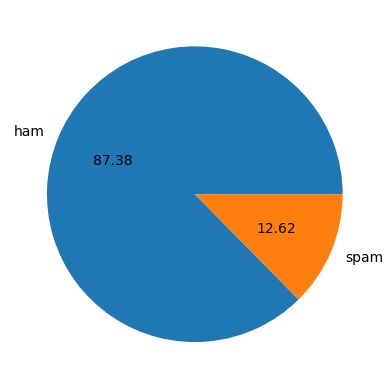

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

# THis shows that the data is imbalenced

In [17]:
# Perform deeper analysis
import nltk

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/arjitsharma/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Create no. of characters 
df['num_Chars'] = df['SMS'].apply(len)

In [20]:
#Create number of words
df['num_words'] = df['SMS'].apply(lambda x : len(nltk.word_tokenize(x)))

In [21]:
df['num_sentences'] = df['SMS'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,Target,SMS,num_Chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_Chars', 'num_words', 'num_sentences']].describe()

,num_Chars,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# Describe for hams
df[df['Target']==0][['num_Chars', 'num_words', 'num_sentences']].describe()

,num_Chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# Spam messages
df[df['Target']==1][['num_Chars', 'num_words', 'num_sentences']].describe()

,num_Chars,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


From the above analysis using "describe" we can conclude that spam maessages are longer than the ham mesasges

In [26]:
# Plotting 
import seaborn as sns


<Axes: xlabel='num_Chars', ylabel='Count'>

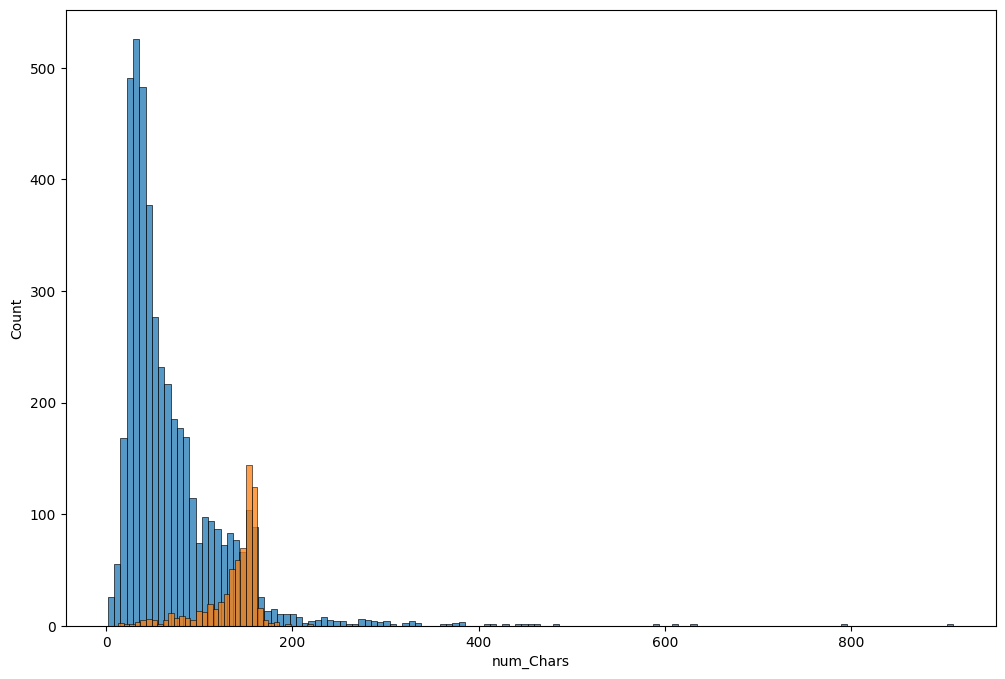

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_Chars']) # ham histogram
sns.histplot(df[df['Target']==1]['num_Chars']) # spam histogram

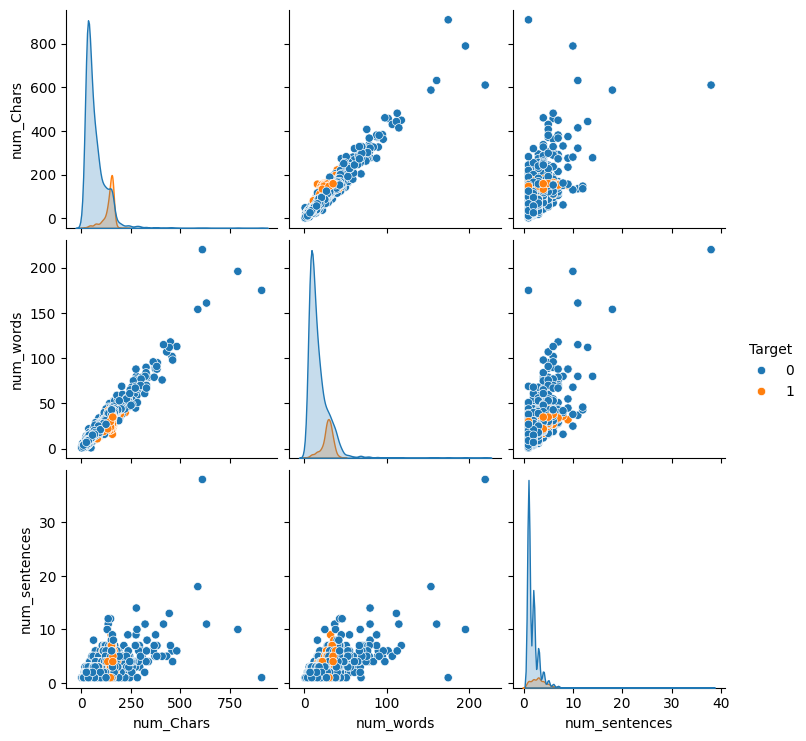

In [28]:
sns.pairplot(df, hue='Target')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Target         5168 non-null   int64 
 1   SMS            5168 non-null   object
 2   num_Chars      5168 non-null   int64 
 3   num_words      5168 non-null   int64 
 4   num_sentences  5168 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.2+ KB


<Axes: >

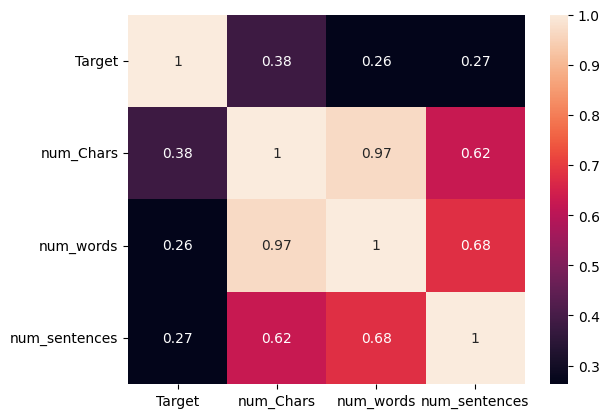

In [30]:
numeric_cols = df[['Target', 'num_Chars', 'num_words', 'num_sentences']]
sns.heatmap(numeric_cols.corr(),annot=True)

## Text/Data Preprocessing
1. Lower case
2. Tokenisation
3. remove special characters
4. remove stop words and punctuation
5. stemming

In [31]:
from nltk.corpus import stopwords
import string
stop_words = stopwords.words('english')
punctuations = string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    # Convert into lower case
    text = text.lower()
    #tokenisation
    text = nltk.word_tokenize(text=text)
    
    #Remove special characters
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    
    text = y[:]
    y.clear()

    # Remove stop words and punctuations
    for i in text:
        if i not in stop_words and i not in punctuations:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
transform_text('I loved the Youtube lectrures on Machine learning, how about you >??')

'love youtub lectrur machin learn'

In [33]:
df['transformed_text'] = df['SMS'].apply(transform_text)

In [34]:
df.head()

,Target,SMS,num_Chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

10106

In [36]:
dic = {}
for w in spam_corpus:
    if w not in dic:
        dic[w] = 1
    else:
        dic[w] += 1


In [37]:
pd.DataFrame(list(sorted(dic.items(), key=lambda item: item[1], reverse=True))[:30])

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,102


In [38]:
df.head()

,Target,SMS,num_Chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
df.isna().sum()

Target              0
SMS                 0
num_Chars           0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

## Model development

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [41]:
X_cv = cv.fit_transform(df['transformed_text']).toarray()
X_tv = tf.fit_transform(df['transformed_text']).toarray()

In [44]:
X_tv.shape

(5168, 3000)

In [135]:
y = df['Target'].values

In [136]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

X_train,X_test, y_train, y_test = train_test_split(X_tv,y, test_size=0.2, random_state=2)
gnb_model = GaussianNB()
bnb_model = BernoulliNB()
mnb_model = MultinomialNB()

In [138]:
# Gaussian
gnb_model.fit(X_train,y_train)
y_pred_gnb = gnb_model.predict(X_test)
print('accuracy_score: ',accuracy_score(y_true = y_test,y_pred = y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print('precision_score: ',precision_score(y_test, y_pred_gnb))

accuracy_score:  0.8752417794970987
[[791 102]
 [ 27 114]]
precision_score:  0.5277777777777778


In [139]:
# Bernoullie
bnb_model.fit(X_train,y_train)
y_pred_bnb = bnb_model.predict(X_test)
print('accuracy_score: ',accuracy_score(y_true = y_test,y_pred = y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print('precision_score: ',precision_score(y_test, y_pred_bnb))


accuracy_score:  0.9796905222437138
[[892   1]
 [ 20 121]]
precision_score:  0.9918032786885246


In [140]:
# Multinomial
mnb_model.fit(X_train,y_train)
y_pred_mnb = mnb_model.predict(X_test)
print('accuracy_score: ',accuracy_score(y_true = y_test,y_pred = y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print('precision_score: ',precision_score(y_test, y_pred_mnb))

### We choose Mulitnomial model with Tfidf

accuracy_score:  0.9700193423597679
[[893   0]
 [ 31 110]]
precision_score:  1.0


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [143]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [144]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [145]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, np.float64(0.9834710743801653))

In [146]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9834710743801653
For  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.8602150537634409
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946


/Users/arjitsharma/Documents/ML projects/SMS Spam classification/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714


In [147]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [149]:
performance_df

#Naive Baise outperforms the all

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
3,DT,0.928433,0.860215
